# Homework 2: Due 2018-09-30 Mathias Schmidt

Use a Chebyshev method to solve the second order ordinary differential equation

\begin{equation*}
u^{''}(t)+au^{'}(t)+bu(t) = f(t)
\end{equation*}

from $t=0$ to $t=1$ with initial conditions $u(0)=1$ and $u^{'}=0$.

$1.$ Do a grid convergence study to test the accuracy of your method. <br>
$2.$ Setting $f(t)=0$, experiment with the values $a$ and $b$ to identify two regimes with qualitatively different dynamics.

In [114]:
%matplotlib inline
import numpy
from matplotlib import pyplot
pyplot.style.use('ggplot')

def vander_chebyshev(x, n=None):
    if n is None:
        n = len(x)
    T = numpy.ones((len(x), n))
    if n > 1:
        T[:,1] = x
    for k in range(2,n):
        T[:,k] = 2 * x * T[:,k-1] - T[:,k-2]
    return T

In [115]:
def chebeval(z, n=None):
    """Build matrices to evaluate the n-term Chebyshev expansion and its derivatives at point(s) z"""
    z = numpy.array(z, ndmin=1)
    if n is None:
        n = len(z)
    Tz = vander_chebyshev(z, n)
    dTz = numpy.zeros_like(Tz)
    dTz[:,1] = 1
    dTz[:,2] = 4*z
    ddTz = numpy.zeros_like(Tz)
    ddTz[:,2] = 4
    for n in range(3,n):
        dTz[:,n]  = n * (2*Tz[:,n-1] + dTz[:,n-2]/(n-2))
        ddTz[:,n] = n * (2*dTz[:,n-1] + ddTz[:,n-2]/(n-2))
    return [Tz, dTz, ddTz]

In [116]:
def cosspace(a, b, n=50):
    return (a + b)/2 + (b - a)/2 * (numpy.cos(numpy.linspace(-numpy.pi, 0, n)))

In [117]:
def laplacian_cheb(n, rhsfunc, a, b):

    x = cosspace(0, 1, n+1)  # n+1 points is n "elements"
    T = chebeval(2*x - 1)
    T[1]  = 2*T[1]
    T[2] = 4*T[2]
    L = T[2]+a*T[1]+b*T[0]
    rhs = rhsfunc(x)
    
    L[0] = T[0][0] 
    L[-1] = T[1][0] 

    rhs[0] = 1
    rhs[-1] = 0 
    
    return x, L.dot(numpy.linalg.inv(T[0])), rhs  

In [118]:
def exact_solution(x):
    return numpy.e**(-x)*(x+1)

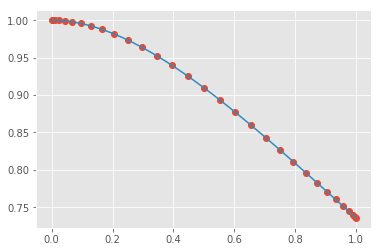

In [119]:
x, L, rhs = laplacian_cheb(30, lambda x: 0*x, 2, 1)

uu = numpy.linalg.solve(L, rhs)
pyplot.plot(x, uu, 'o')

xx = numpy.linspace(0,1,200)
pyplot.plot(xx,numpy.e**(-xx)*(xx+1))

# Grid refinement study


In [129]:
def mms_error(n, discretize, exact_solution):
    x, L, f = laplacian_cheb(n, lambda x: 0*x, 2, 1)
    u = numpy.linalg.solve(L, f)
    return numpy.linalg.norm(u - exact_solution(x), numpy.inf)

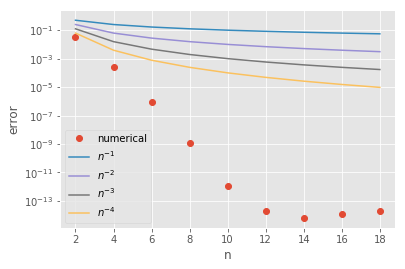

In [131]:
ns = numpy.arange(2,20,2)

errors = [mms_error(n, laplacian_cheb, exact_solution) for n in ns]
pyplot.figure()
pyplot.semilogy(ns, errors, 'o', label='numerical')
for p in range(1,5):
    pyplot.semilogy(ns, 1/ns**(p), label='$n^{-%d}$'%p)
pyplot.xlabel('n')
pyplot.ylabel('error')
pyplot.legend(loc='lower left');